# Classification

In [738]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [739]:
df = pd.read_csv('../eda/cars-data.csv')

df.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,gas,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,gas,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,gas,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993


In [740]:
nan_count = df.isna().sum()

print(nan_count)

Unnamed: 0           0
city_mpg             0
class                0
combination_mpg      0
cylinders          124
displacement       124
drive                8
fuel_type            0
highway_mpg          0
make                 0
model                0
transmission         0
year                 0
dtype: int64


In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    object 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    object 
 7   fuel_type        719 non-null    object 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    object 
 10  model            719 non-null    object 
 11  transmission     719 non-null    object 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 73.2+ KB


In [742]:
# Convert all 'object' type columns to 'string'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('string')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    string 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    string 
 7   fuel_type        719 non-null    string 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    string 
 10  model            719 non-null    string 
 11  transmission     719 non-null    string 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), string(6)
memory usage: 73.2 KB


In [743]:
# get y 

y = df['fuel_type'].unique().tolist()

# Replace 'diesel' with 'gas' in the entire DataFrame
df.replace('diesel', 'gas', inplace=True)

y = df['fuel_type'].unique().tolist()

y

['gas', 'electricity']

In [744]:

# Dropping non-numerical and unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [745]:
# Replace continuous missing values with mean of the column. check for Nan values again.

cols = ['displacement', 'cylinders']
df[cols] = df[cols].fillna(df[cols].mean())

nan_count = df.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              8
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [746]:
# Replace categorical missing values with mode of the column. check for Nan values again.

df['drive'] = df['drive'].fillna(df['drive'].mode().iloc[0])

nan_count = df.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [747]:
# Using a for loop to replace categorical values with cat codes
cat_cols = ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission']
for col in cat_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

# Display the altered DataFrame
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,18,2,21,4.0,2.2,2,1,26,24,33,0,1993
1,19,2,22,4.0,2.2,2,1,27,24,33,1,1993
2,16,2,19,6.0,3.0,2,1,22,24,33,0,1993
3,16,2,18,6.0,3.0,2,1,22,24,33,1,1993
4,18,4,21,4.0,2.2,2,1,26,24,33,0,1993


In [748]:
# LOOK AT FIRST ROW
print(df.iloc[0])

city_mpg             18.0
class                 2.0
combination_mpg      21.0
cylinders             4.0
displacement          2.2
drive                 2.0
fuel_type             1.0
highway_mpg          26.0
make                 24.0
model                33.0
transmission          0.0
year               1993.0
Name: 0, dtype: float64


In [749]:
# INSERT CODE TO PRINT COLUMN NAMES
df.columns

Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')

In [750]:
#INSERT CODE TO PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN 

summary = df.describe().T  
summary['dtypes'] = df.dtypes 
summary = summary[['dtypes', 'min', 'mean', 'max']]  
print(summary)

                  dtypes     min         mean     max
city_mpg           int64     9.0    34.051460   150.0
class               int8     0.0     7.634214    15.0
combination_mpg    int64    11.0    35.094576   136.0
cylinders        float64     3.0     5.154622    10.0
displacement     float64     1.4     2.760336     6.2
drive               int8     0.0     1.815021     3.0
fuel_type           int8     0.0     0.827538     1.0
highway_mpg        int64    12.0    37.329624   123.0
make                int8     0.0    13.137691    26.0
model              int16     0.0    73.645341   150.0
transmission        int8     0.0     0.219750     1.0
year               int64  1984.0  2006.634214  2023.0


In [751]:
# Count the number of samples for each target value
# resource: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html


target_counts = df['fuel_type'].value_counts(normalize=True)  # normalize=True to get the proportions

# Print the results
for target, count in target_counts.items():
    print(f"Number of points with target={target}: {count * len(df)} {count}")

Number of points with target=1: 595.0 0.827538247566064
Number of points with target=0: 124.0 0.17246175243393602


(12, 12)


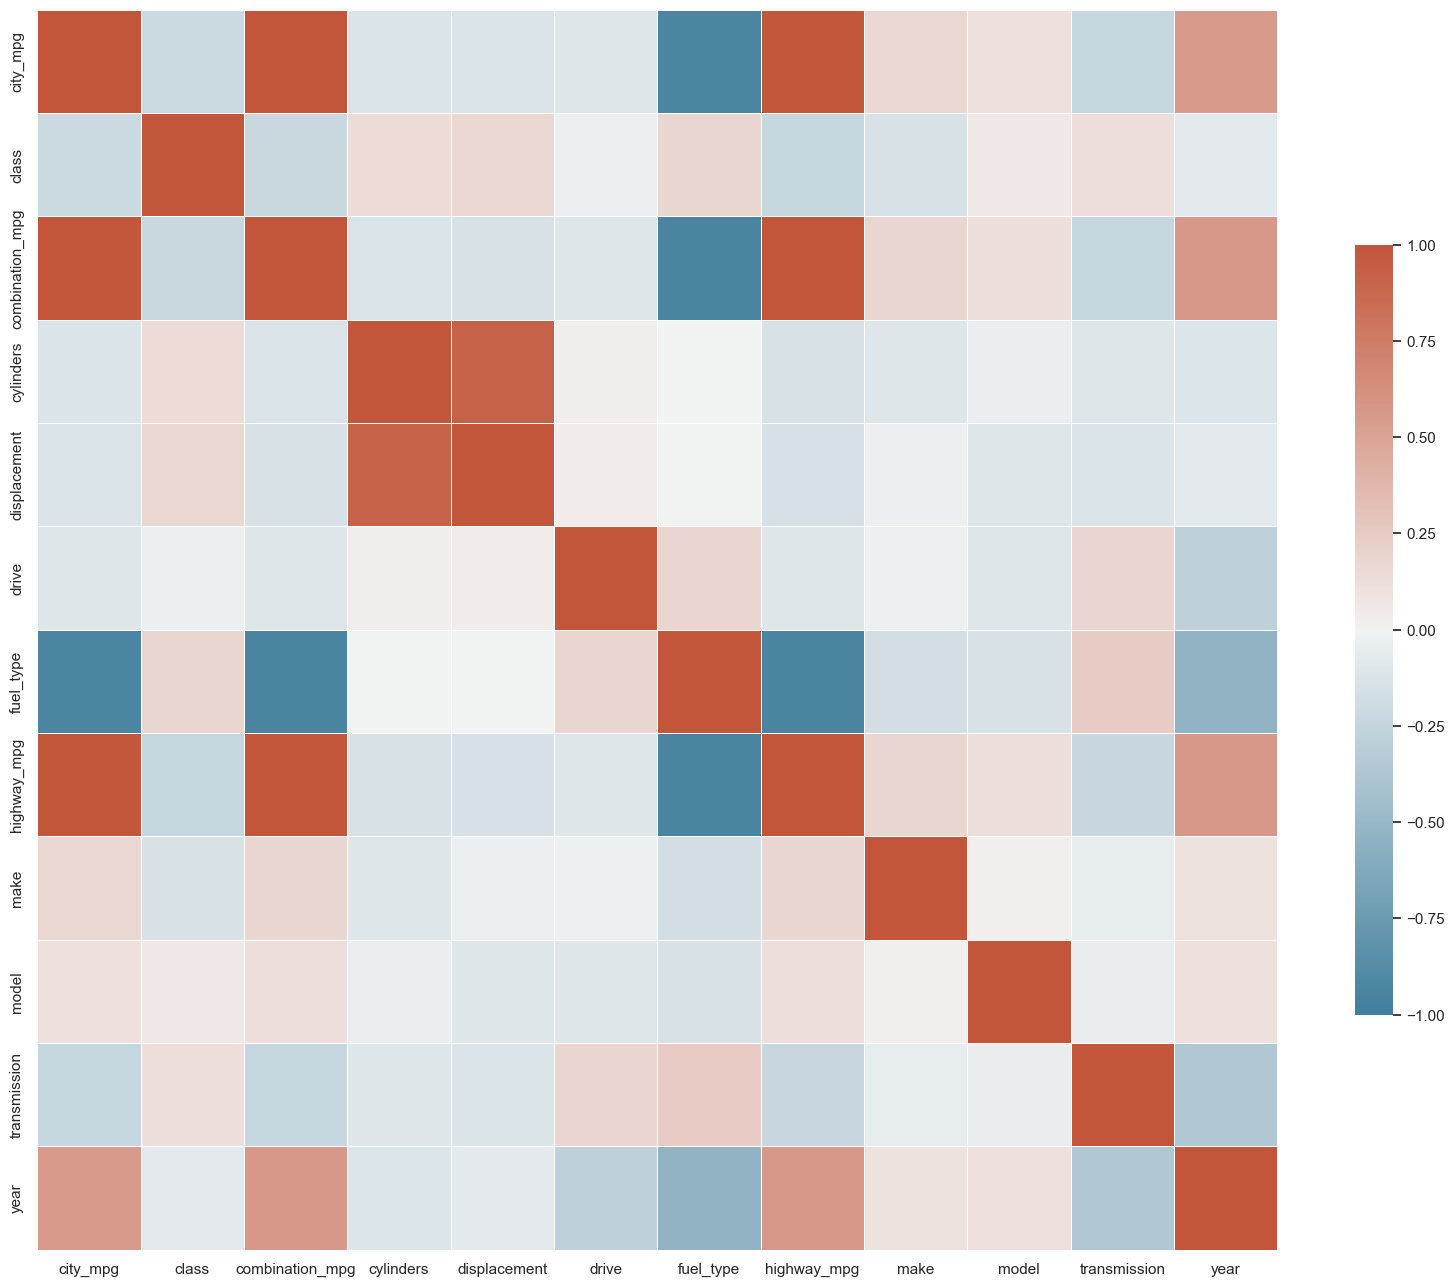

In [752]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

In [753]:
# # # RUN THE FOLLOWING CODE TO GENERATE A SEABORN PAIRPLOT 
# tmp=pd.concat([df.sample(n=10,axis=1),y],axis=1)
# print(tmp.shape)
# sns.pairplot(tmp,hue="fuel_type", diag_kind='kde')
# plt.show()

In [754]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
# Resource used: https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed


X = df.drop('fuel_type', axis=1)  # X includes everything except the target column
y = df['fuel_type']  # Y is just the target column

In [755]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [756]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
# Changed the output structure for better understanding

print("TRAINING SHAPES: \n", f"x_train:\n shape: {x_train.shape}\n type: {type(x_train)}\n", f"y_train:\n shape: {y_train.shape}\n type: {type(y_train)}\n")
print("TEST SHAPES: \n", f"x_test:\n shape: {x_test.shape}\n type: {type(x_test)}\n", f"y_test:\n shape: {y_test.shape}\n type: {type(y_test)}\n")

TRAINING SHAPES: 
 x_train:
 shape: (575, 11)
 type: <class 'pandas.core.frame.DataFrame'>
 y_train:
 shape: (575,)
 type: <class 'pandas.core.series.Series'>

TEST SHAPES: 
 x_test:
 shape: (144, 11)
 type: <class 'pandas.core.frame.DataFrame'>
 y_test:
 shape: (144,)
 type: <class 'pandas.core.series.Series'>



In [757]:
#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [758]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [759]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def confusion_plot(y_data, y_pred):

    cm = confusion_matrix(y_data, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_data, y_pred)
    negative_recall = recall_score(y_data, y_pred)
    negative_precision = precision_score(y_data, y_pred)
    positive_recall = recall_score(y_data, y_pred)
    positive_precision = precision_score(y_data, y_pred)
    
    # Print metrics
    print(f"ACCURACY: {accuracy}")
    print(f"NEGATIVE RECALL (Y=0): {negative_recall}")
    print(f"NEGATIVE PRECISION (Y=0): {negative_precision}")
    print(f"POSITIVE RECALL (Y=1): {positive_recall}")
    print(f"POSITIVE PRECISION (Y=1): {positive_precision}")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    plt.show()

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[103   0]
 [  0 472]]


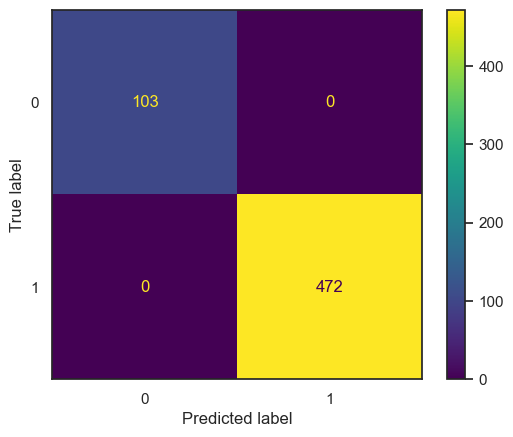

------TEST------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[ 21   0]
 [  0 123]]


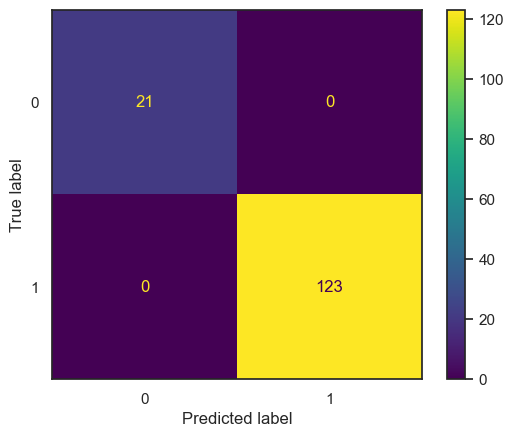

In [760]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

In [761]:
from sklearn import tree
import matplotlib.pyplot as plt

def plot_tree(model, X, Y):
    # Determine class names if Y is categorical and has more than one unique value
    class_names = np.unique(Y).astype(str).tolist() if len(np.unique(Y)) > 1 else None

    plt.figure(figsize=(20, 10))
    tree.plot_tree(model,
                   feature_names=X.columns.tolist(),
                   class_names=class_names,
                   filled=True)
    plt.show()


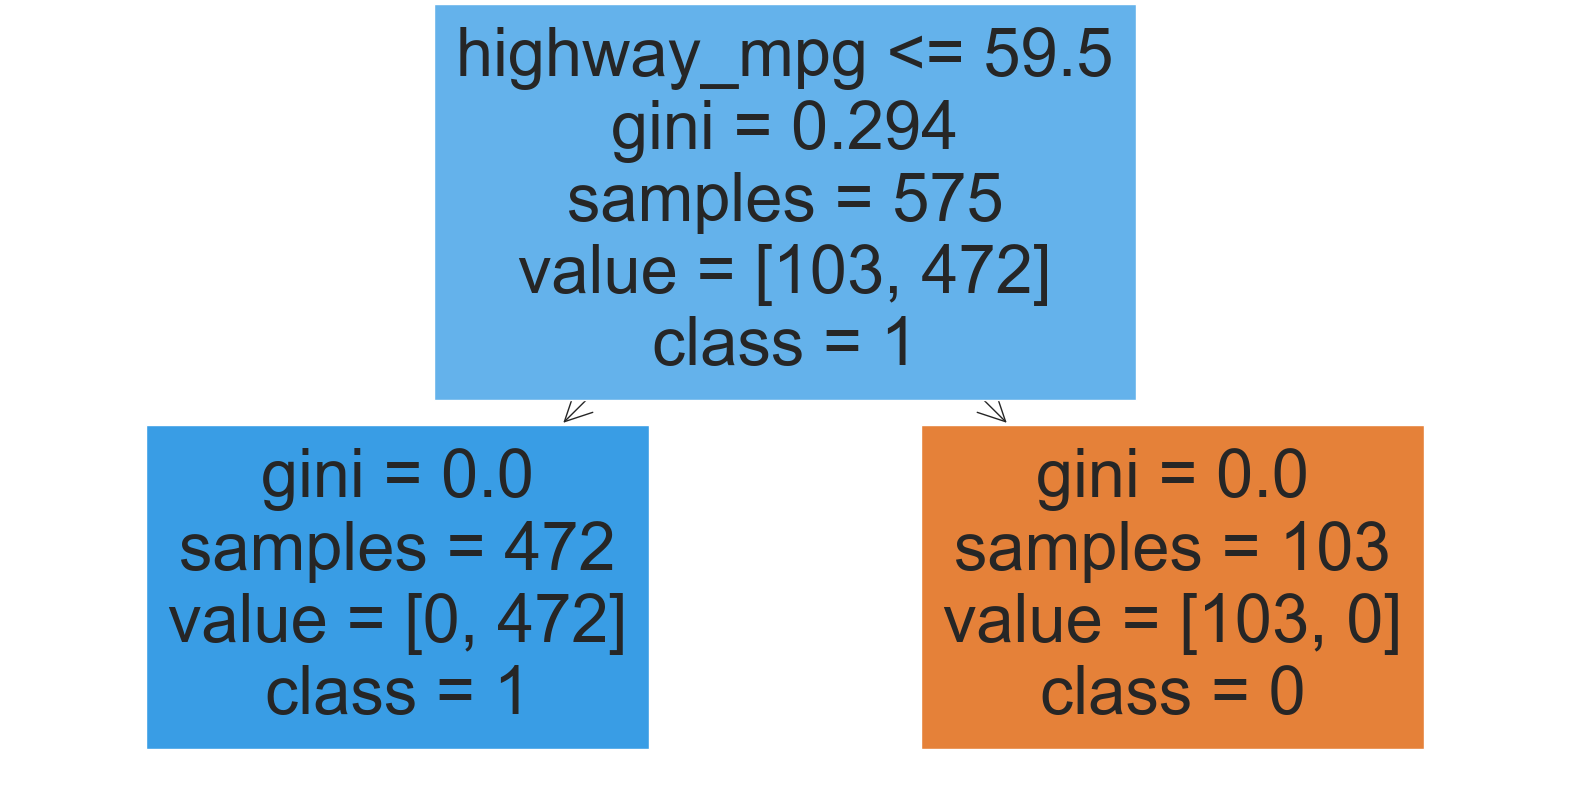

In [762]:
plot_tree(model,X,y)

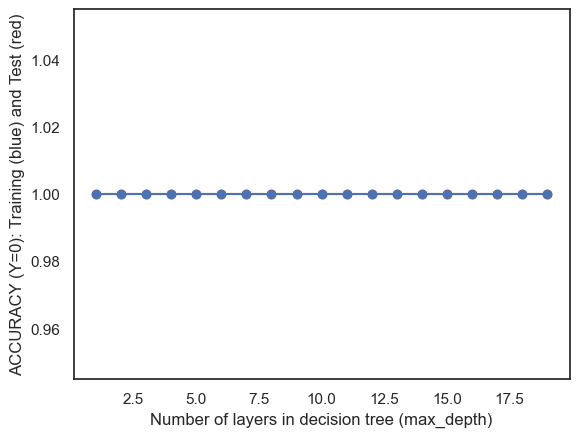

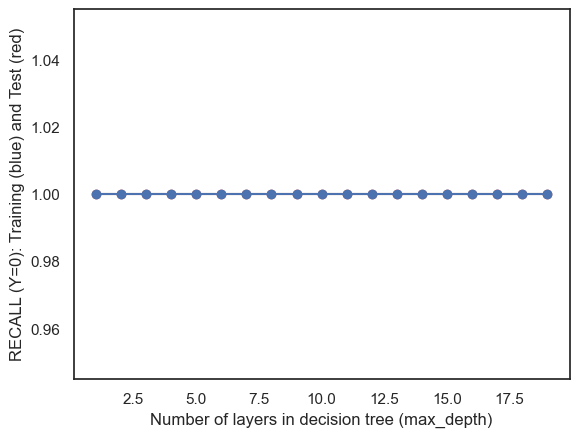

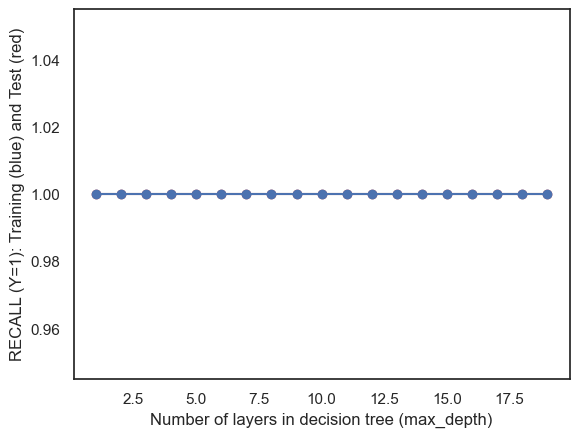

In [763]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])

test_results=np.array(test_results)
train_results=np.array(train_results)
col=1
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('ACCURACY (Y=0): Training (blue) and Test (red)') 
plt. show()

col=2
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('RECALL (Y=0): Training (blue) and Test (red)') 
plt. show()

col=3
plt.plot (test_results[:,0],test_results[:,col],'-or')
plt.plot(train_results[:,0],train_results[: ,col],'-ob')
plt.xlabel('Number of layers in decision tree (max_depth)') 
plt.ylabel ('RECALL (Y=1): Training (blue) and Test (red)') 
plt. show()

In [764]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[103   0]
 [  0 472]]


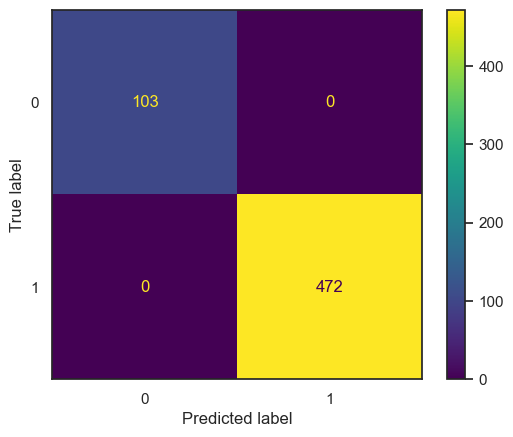

------TEST------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[ 21   0]
 [  0 123]]


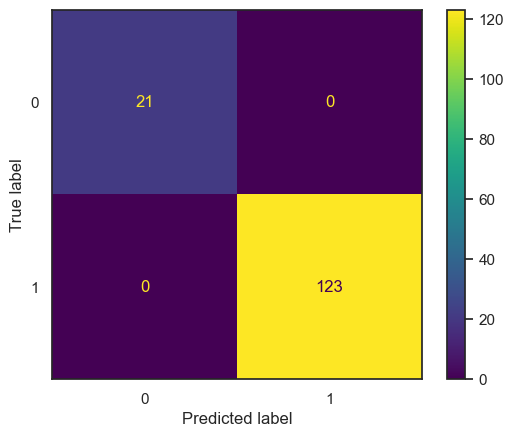

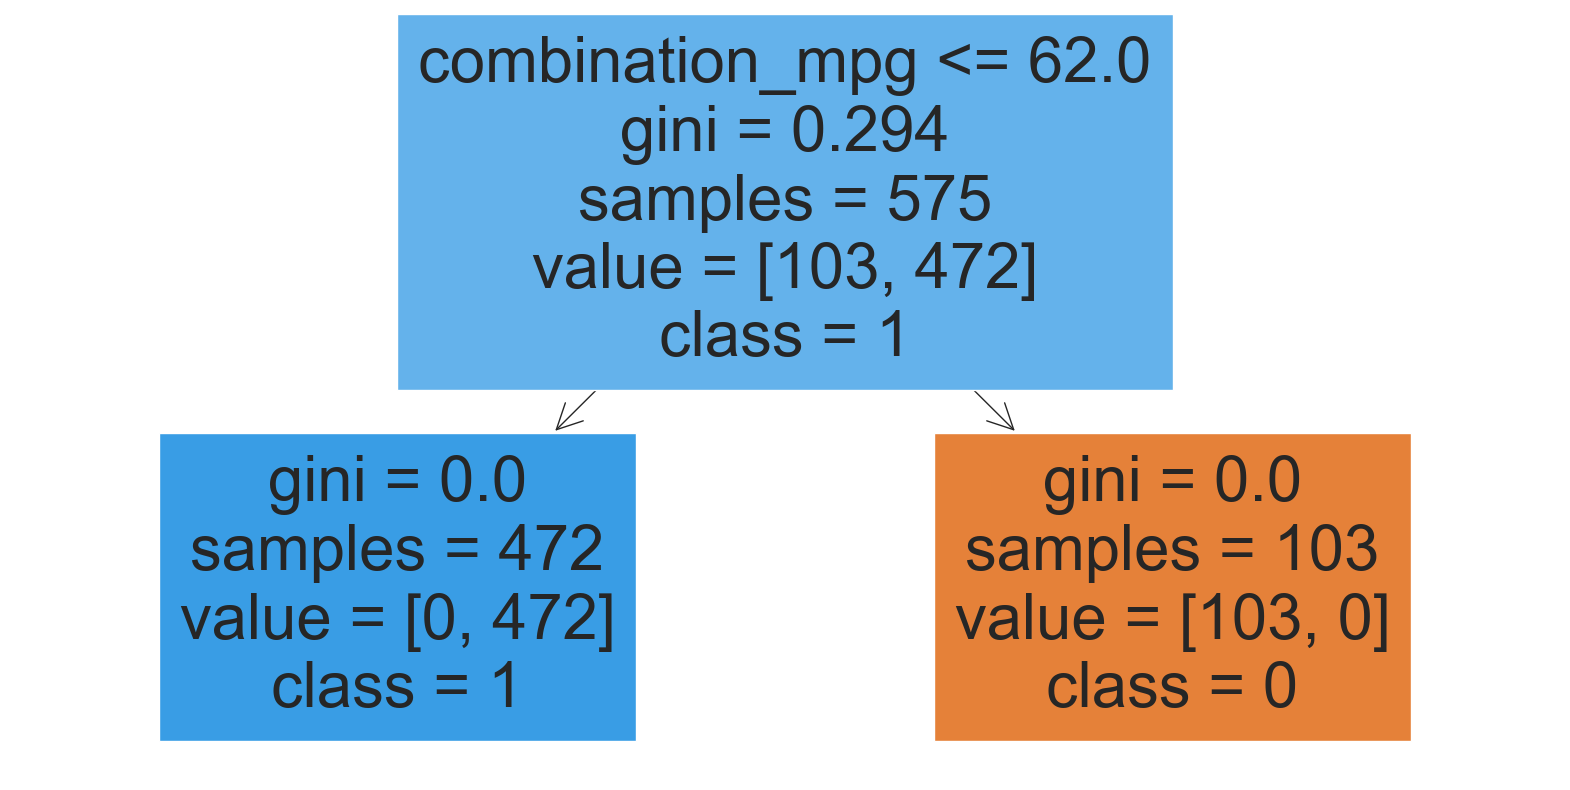

In [765]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,y)
